In [34]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os

#### 1)Загрузка и отображение изображения:
Выберите цветное изображение по вашему выбору (например, природа, архитектура, портрет).
С помощью библиотек OpenCV или PIL загрузите изображение в программу.
Отобразите исходное изображение.

In [3]:
img = cv.imread(r"../data/hameleon.jpg")

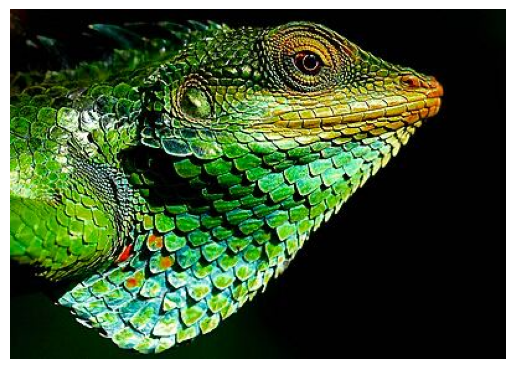

In [4]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # OpenCV использует BGR, а Matplotlib — RGB
plt.imshow(img)
plt.axis("off")
plt.show()

#### 2)Преобразование цветовых пространств:
Преобразуйте изображение из RGB в Grayscale и HSV.
Отобразите каждое из полученных изображений.
Постройте гистограммы яркости для исходного и серого изображений.

(-0.5, 399.5, 281.5, -0.5)

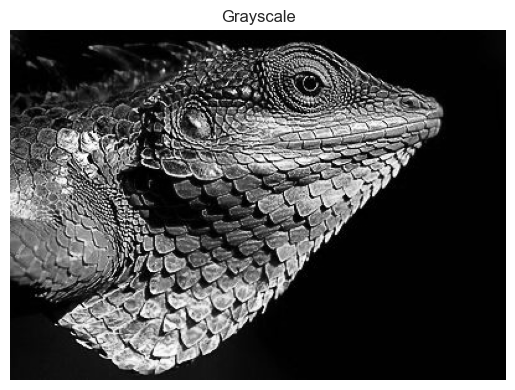

In [5]:

gray_image = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
plt.title("Grayscale")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

HSV часто используется для задач сегментации и выделения объектов по цвету.

(-0.5, 399.5, 281.5, -0.5)

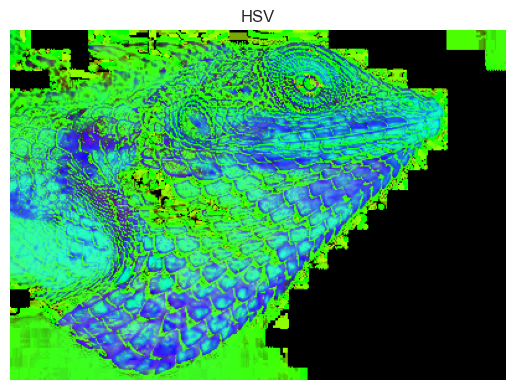

In [6]:
hsv_image = cv.cvtColor(img, cv.COLOR_RGB2HSV)
plt.title("HSV")
plt.imshow(hsv_image,  cmap='hsv')
plt.axis('off')
# вывод плохой, потмоу что matlot работает с RGB

Text(0, 0.5, 'Количество пикселей')

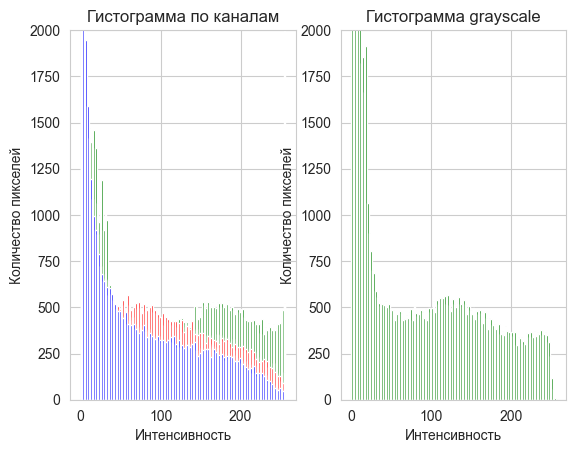

In [7]:
fig, ax = plt.subplots(1,2)

ax[0].hist(img[:,:,1].ravel(), bins=128, color='green', range=[0, 256])
ax[0].hist(img[:,:,0].ravel(), bins=128, color='red', range=[0, 256])
ax[0].hist(img[:,:,2].ravel(), bins=128, color='blue', range=[0, 256])
ax[0].set_ylim([0,2000])
ax[0].set_title('Гистограмма по каналам')
ax[0].set_xlabel('Интенсивность')
ax[0].set_ylabel('Количество пикселей')
ax[0].set_ylim([0, 2000])

ax[1].hist(gray_image.ravel(), bins=128, color='green', range=[0, 256])
ax[1].set_ylim([0,2000])
ax[1].set_title('Гистограмма grayscale')
ax[1].set_xlabel('Интенсивность')
ax[1].set_ylabel('Количество пикселей')

#### 3)Фильтрация изображений:
Примените к серому изображению следующие фильтры:
Гауссово сглаживание с разными значениями σ (сигма).
Медианный фильтр с разными размерами ядра.
Фильтр Лапласа для повышения резкости.
Отобразите результаты фильтрации и сравните их визуально

(-0.5, 399.5, 281.5, -0.5)

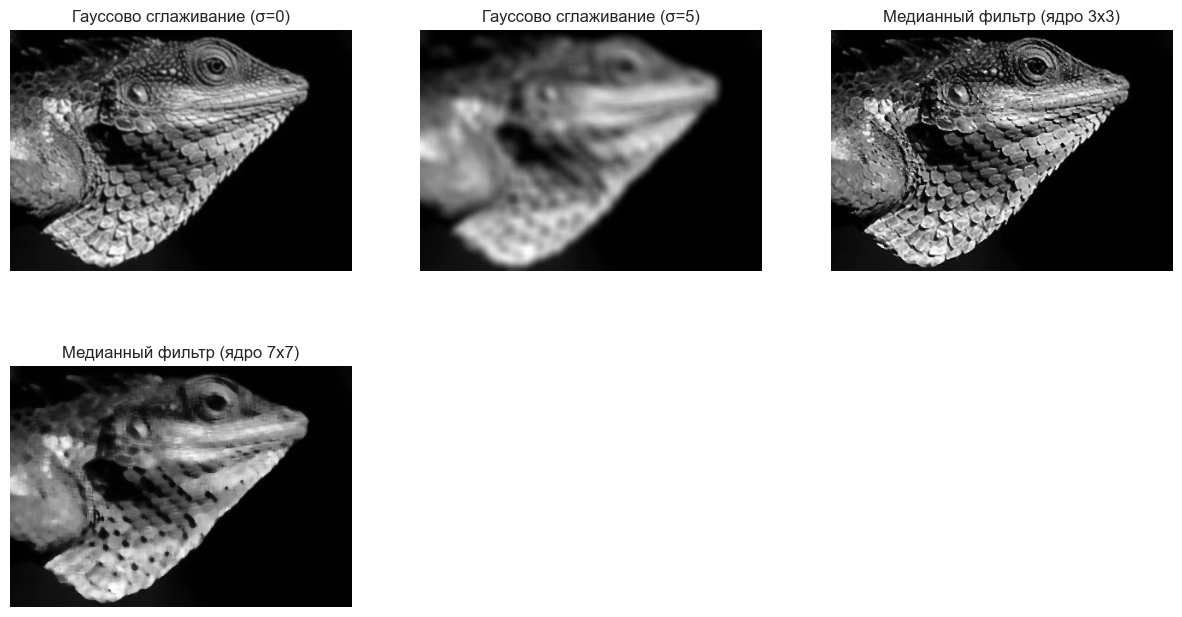

In [8]:
# Гауссово сглаживание
gaussian_blur_1 = cv.GaussianBlur(gray_image, (5, 5), 0)
gaussian_blur_2 = cv.GaussianBlur(gray_image, (15, 15), 5)

# Медианный фильтр
median_blur_1 = cv.medianBlur(gray_image, 3)
median_blur_2 = cv.medianBlur(gray_image, 7)

# Фильтр Лапласа
laplacian = cv.Laplacian(gray_image, cv.CV_64F,3)

plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.title("Гауссово сглаживание (σ=0)")
plt.imshow(gaussian_blur_1, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title("Гауссово сглаживание (σ=5)")
plt.imshow(gaussian_blur_2, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title("Медианный фильтр (ядро 3x3)")
plt.imshow(median_blur_1, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title("Медианный фильтр (ядро 7x7)")
plt.imshow(median_blur_2, cmap='gray')
plt.axis('off')

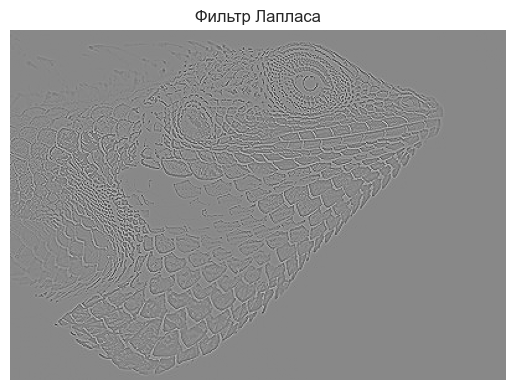

In [9]:
plt.title("Фильтр Лапласа")
plt.imshow(laplacian, cmap='gray')
plt.axis('off')

plt.show()

#### 4)Выделение краев и углов:
Используйте оператор Собеля для определения горизонтальных и вертикальных градиентов.
Примените алгоритм Кэнни для обнаружения краев.
Используйте детектор углов Harris или Shi-Tomasi для выявления угловых точек.
Наложите результаты на исходное изображение и отобразите

### Оператор Собеля

In [10]:
scale = 1
delta = 0
ddepth = cv.CV_16S
src = cv.GaussianBlur(img, (3, 3), 0)
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
grad_x = cv.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
grad_y = cv.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)


grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

Text(0.5, 1.0, 'Значение градиента по Оy')

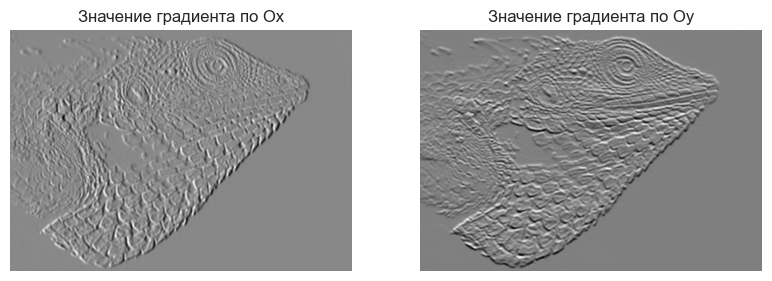

In [11]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 3, 1)
plt.imshow(grad_x, cmap='gray')
plt.axis('off')
plt.title("Значение градиента по Ох")

plt.subplot(1, 3, 2)
plt.imshow(grad_y, cmap='gray')
plt.axis('off')
plt.title("Значение градиента по Оy")

(-0.5, 399.5, 281.5, -0.5)

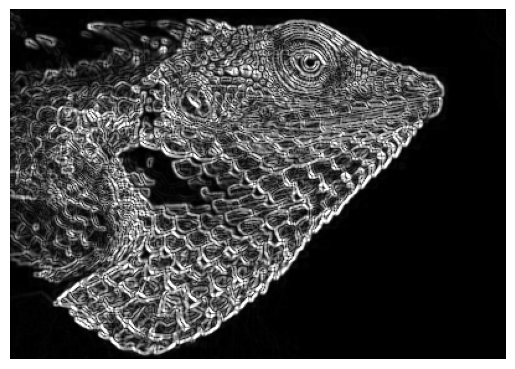

In [12]:
plt.imshow(grad, cmap = "gray")
plt.axis('off')

(-0.5, 399.5, 281.5, -0.5)

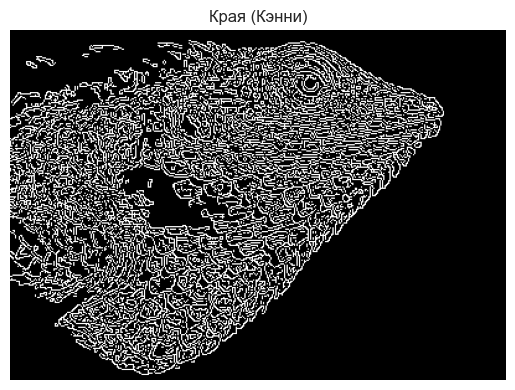

In [13]:
edges = cv.Canny(gray_image, 100, 200)
plt.title("Края (Кэнни)")
plt.imshow(edges, cmap='gray')
plt.axis('off')

Слишком слабые пороги. Хотели бы  увидеть контуры чешуи

(-0.5, 399.5, 281.5, -0.5)

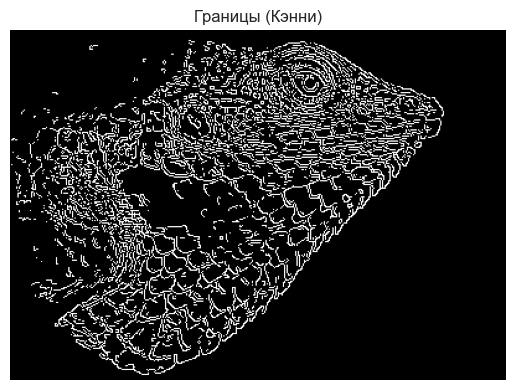

In [14]:
edges = cv.Canny(gray_image, 400, 500)
plt.title("Границы (Кэнни)")
plt.imshow(edges, cmap='gray')
plt.axis('off')

Далее поменяем картинку

(-0.5, 1079.5, 719.5, -0.5)

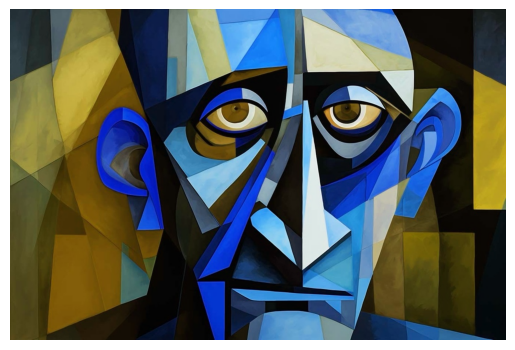

In [15]:
img_cub = cv.imread(r"../data/cubism.png")
plt.imshow(img_cub)
plt.axis('off')

(-0.5, 1079.5, 719.5, -0.5)

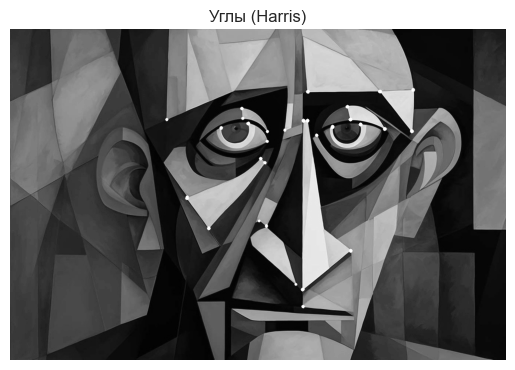

In [22]:
img_cub_gray = cv.cvtColor(img_cub, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(img_cub_gray,3,3,0.04)
image_with_corners = img_cub_gray.copy()
mask = dst>0.1*dst.max()
y_coords, x_coords = np.where(mask)
# Рисуем круги
for x, y in zip(x_coords, y_coords):
    cv.circle(image_with_corners, (x, y), 3, 255, -1)
#image_with_corners[mask]=[255]
plt.title("Углы (Harris)")
plt.imshow(image_with_corners, cmap='gray')
plt.axis('off')

(-0.5, 1079.5, 719.5, -0.5)

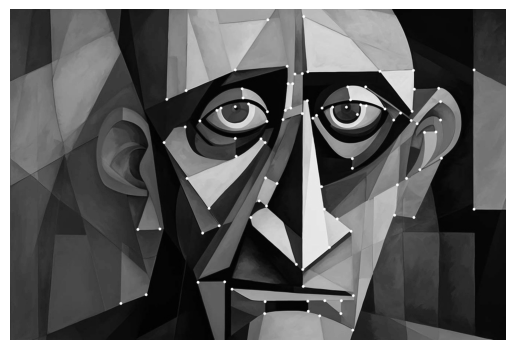

In [23]:
corners = cv.goodFeaturesToTrack(img_cub_gray,100,0.0001,10)
corners = np.intp(corners)
image_with_corners = img_cub_gray.copy()
for i in corners:
    x,y = i.ravel()
    cv.circle(image_with_corners,(x,y),3,255,-1)
plt.imshow(image_with_corners, cmap='gray')
plt.axis('off')

#### 5)Морфологические операции:
Бинаризуйте серое изображение с помощью пороговой сегментации.
Примените операции эрозии и дилатации с различными структурными элементами.
Отобразите результаты и объясните эффект каждой операции. Требования к оформлению:

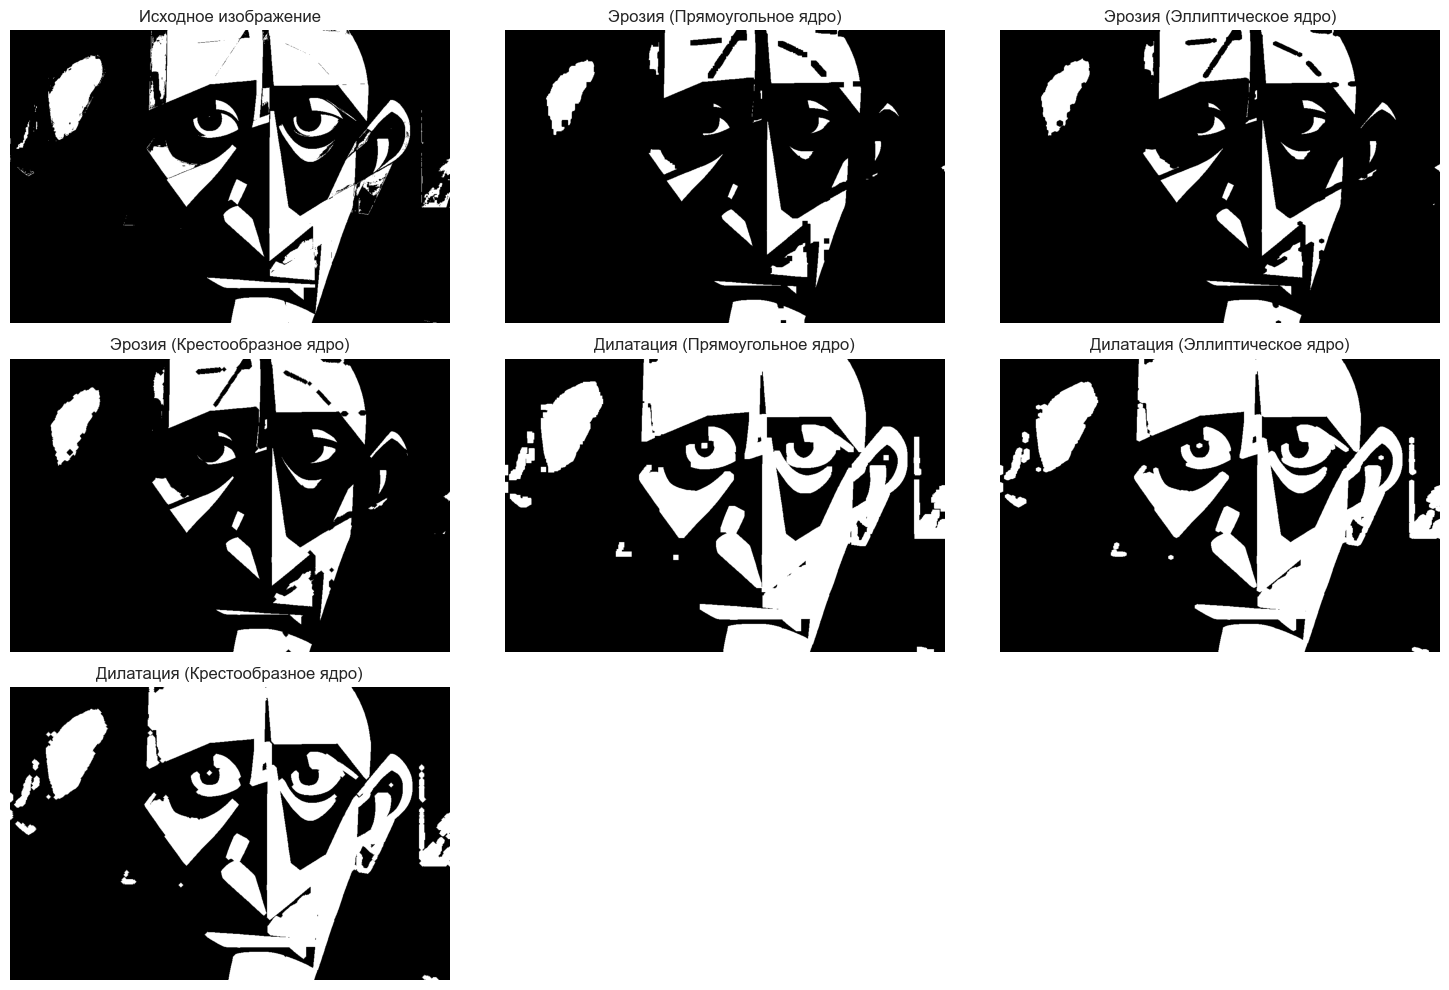

In [33]:
_, binary_image = cv.threshold(img_cub_gray, 127, 255, cv.THRESH_BINARY)  # Бинаризация

kernel_rect = cv.getStructuringElement(cv.MORPH_RECT, (5, 5)) 
kernel_ellipse = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))  
kernel_cross = cv.getStructuringElement(cv.MORPH_CROSS, (5, 5)) 

eroded_rect = cv.erode(binary_image, kernel_rect, iterations=3)
eroded_ellipse = cv.erode(binary_image, kernel_ellipse, iterations=3)
eroded_cross = cv.erode(binary_image, kernel_cross, iterations=3)

dilated_rect = cv.dilate(binary_image, kernel_rect, iterations=3)
dilated_ellipse = cv.dilate(binary_image, kernel_ellipse, iterations=3)
dilated_cross = cv.dilate(binary_image, kernel_cross, iterations=3)

plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
plt.title("Исходное изображение")
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.title("Эрозия (Прямоугольное ядро)")
plt.imshow(eroded_rect, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.title("Эрозия (Эллиптическое ядро)")
plt.imshow(eroded_ellipse, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.title("Эрозия (Крестообразное ядро)")
plt.imshow(eroded_cross, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.title("Дилатация (Прямоугольное ядро)")
plt.imshow(dilated_rect, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.title("Дилатация (Эллиптическое ядро)")
plt.imshow(dilated_ellipse, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.title("Дилатация (Крестообразное ядро)")
plt.imshow(dilated_cross, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

Операция эрозии с заданным ядром - выбирает минимум для пикселя в заданном окне. То есть будет подьедать границы белых областей, увеличивать чёрные полости и убирать небольшие белые шумы. Операция дилатации выбирает максимум для пикселя в заданном окне. Наращивает границу белых областей, заполняет чёрные полости. Использвались три ядра. Большой разницы между прямоугольным и элиптическим в целом и так не должно быть, а крестообразное здесь и не очень было нужно, так как оно восстанавливает в горизантольном и вертикальном направлении тонкие линии,  или наоборот их съедает.

По-хорошему hue в стандартном определении лежит между  0 и 360, и зелёный цвет находится где-то в пределах 90-140. MARK! В OpenCV hue лежит между 0 и 180. И на распределении видим смещение зелёной компоненты соотвественно. Попробуем далее выделить только зелёный цвет, то есть (90-140)/2 = (45-80) примерно

In [13]:
lower_red = np.array([45, 50, 50]) 
upper_red = np.array([80, 255, 255]) 


mask = cv.inRange(hsv_image, lower_red, upper_red)

result = cv.bitwise_and(hsv_image, hsv_image, mask=mask)
result_rgb = cv.cvtColor(result, cv.COLOR_HSV2RGB)

(-0.5, 399.5, 281.5, -0.5)

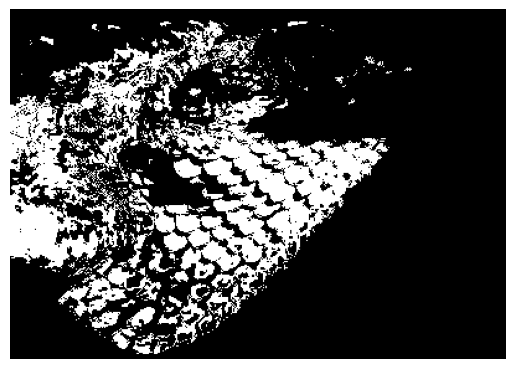

In [14]:
# как выглядит маска
plt.imshow(mask, cmap='gray')
plt.axis('off')

(-0.5, 399.5, 281.5, -0.5)

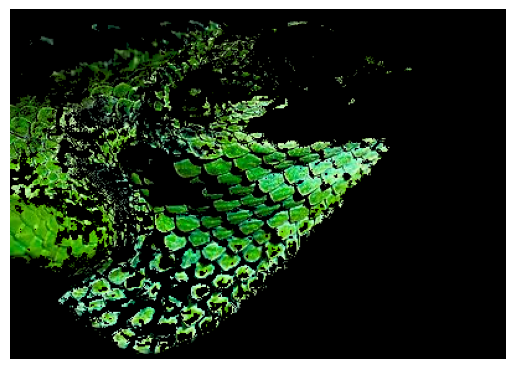

In [15]:
plt.imshow(result_rgb)
plt.axis('off')

### Попробуем выравнять зелёный, используем equalizeHist, но он работает только с одноканальными изображениями

equalizeHist просто берёт область, на которую приходится максимальная плотность распределения, для набора значений( например через один) зануляет интенсивность, и эту площадь перекидывает на оставшиеся значения.

In [16]:
r, g, b = cv.split(img)
g_eq = cv.equalizeHist(g)
equalized_image = cv.merge((r, g_eq, b))

(-0.5, 399.5, 281.5, -0.5)

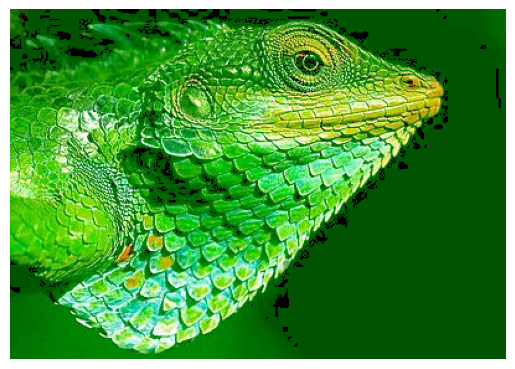

In [17]:
plt.imshow(equalized_image)
plt.axis('off')

Попробуем CLAHE

In [18]:
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(16,16))
cl1 = clahe.apply(g)
equalized_image_CLAHE = cv.merge((r, cl1, b))

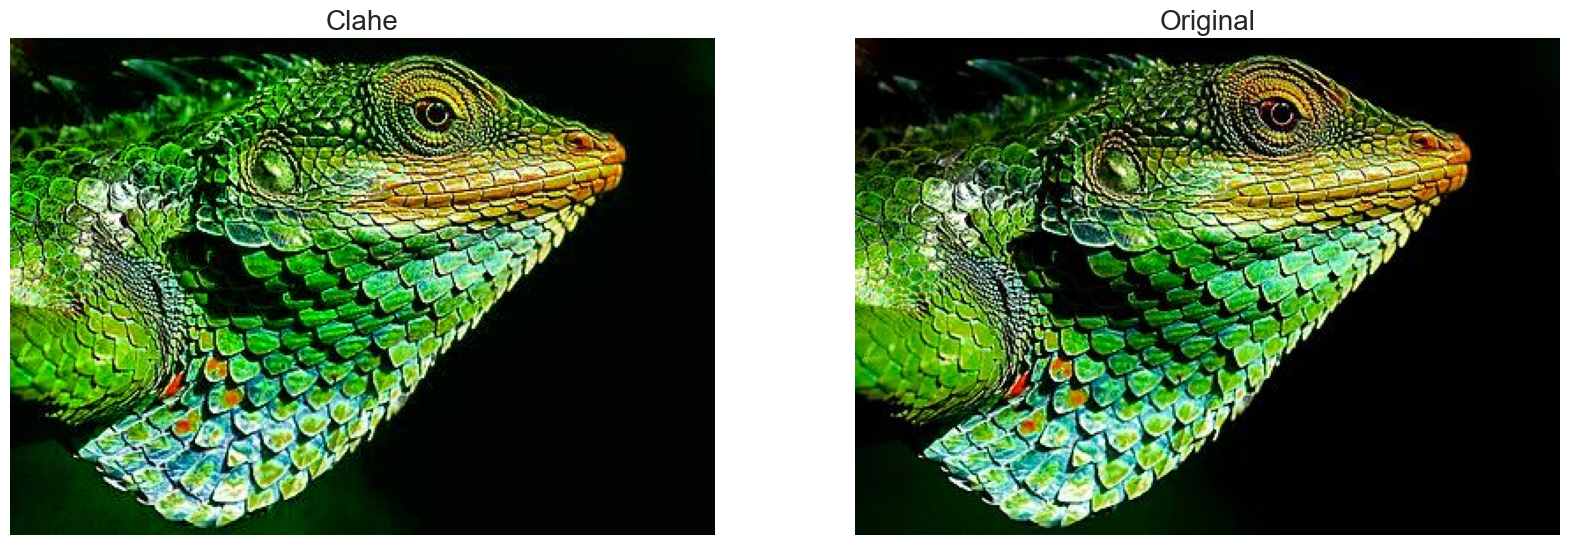

In [19]:
fig, ax = plt.subplots(1,2, figsize=(20, 16))
ax[0].imshow(equalized_image_CLAHE)
ax[0].axis('off')
ax[0].set_title('Clahe', fontsize=20)
ax[1].imshow(img)
ax[1].axis('off')
ax[1].set_title('Original', fontsize=20)
plt.show()

Видим, что действительно после выравнивания методом CLAHE  на зелёном канале весь хамелеон стал более зелёным, причём в отличие от стандартного эквалайзера черный фон не поменялся.

#### Фиксированная пороговая сегментация

Попрробуем изображение с разной освещённостью

(-0.5, 719.5, 539.5, -0.5)

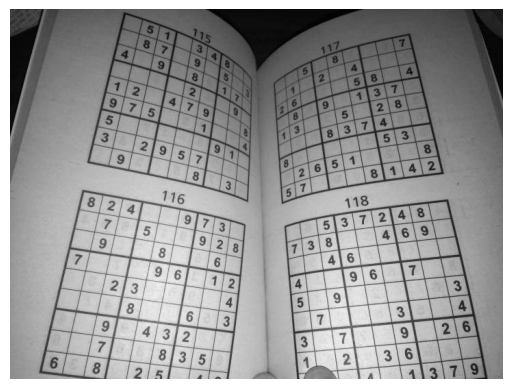

In [40]:
img = cv.imread(r"../data/different_light.jpg")
img  = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img, cmap = 'gray')
plt.axis('off')

In [42]:
ret, binary = cv.threshold(img , 127, 255, cv.THRESH_BINARY)

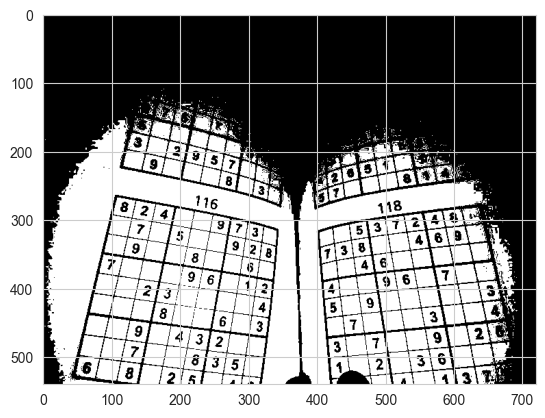

In [43]:
plt.imshow(binary, cmap='gray')

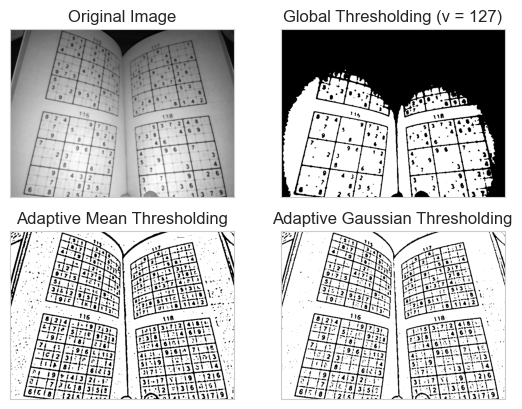

In [44]:
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Сегментация по Оцу - просто автоматический подбор порога трешолда для global threshold

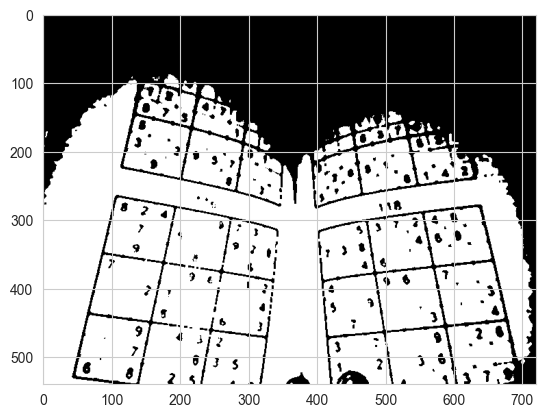

In [45]:
ret, otsu_binary = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
plt.imshow(otsu_binary, cmap='gray')